## Exploratory Data Analysis (EDA) for Weather Data
### Project IV

### Juan Domingo

### 1. Setup and Initial Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for visualizations
sns.set(style="whitegrid")
%matplotlib inline

# Load the dataset
df = pd.read_csv('data/weather_features.csv')

# Display first few rows to understand the data
print("First 20 rows of the dataset:")
display(df.head(20))

First 20 rows of the dataset:


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686000,269.686000,269.686000,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686000,269.686000,269.686000,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686000,269.686000,269.686000,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
5,2015-01-01 05:00:00+01:00,Valencia,270.292000,270.292000,270.292000,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
6,2015-01-01 06:00:00+01:00,Valencia,270.292000,270.292000,270.292000,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
7,2015-01-01 07:00:00+01:00,Valencia,270.292000,270.292000,270.292000,1004,71,2,321,0.0,0.0,0.0,0,800,clear,sky is clear,01n
8,2015-01-01 08:00:00+01:00,Valencia,274.601000,274.601000,274.601000,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d
9,2015-01-01 09:00:00+01:00,Valencia,274.601000,274.601000,274.601000,1005,71,1,307,0.0,0.0,0.0,0,800,clear,sky is clear,01d


Aquí importamos las bibliotecas necesarias y cargamos el dataset. Mostramos las primeras filas para tener una primera impresión de los datos.

In [2]:
print(len(df))
print("First date")
df['dt_iso'].min()


178396
First date


'2015-01-01 00:00:00+01:00'

In [3]:
print("Last date")
df['dt_iso'].max()

Last date


'2018-12-31 23:00:00+01:00'

### 2. Basic Data Overview

In [4]:
# Check dataset shape
print(f"Dataset shape: {df.shape}")

# Get general info about the dataset
print("\nDataset info:")
df.info()

# Check column names
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (178396, 17)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         1783

Verificamos el tamaño del dataset (número de filas y columnas), obtenemos información general sobre los tipos de datos y mostramos los nombres de las columnas.

### 2.1 Getting the Uniques Cities

In [5]:
# Get unique cities names 
unique_cities = df['city_name'].unique()

# Show results
print("Dataset cities:")
print(unique_cities)

Dataset cities:
['Valencia' 'Madrid' 'Bilbao' 'Barcelona' 'Seville']


In [6]:
# View count of records by city
print("Count of records by city:")
print(df['city_name'].value_counts())

Count of records by city:
city_name
Madrid       36267
Bilbao       35951
Seville      35557
Barcelona    35476
Valencia     35145
Name: count, dtype: int64


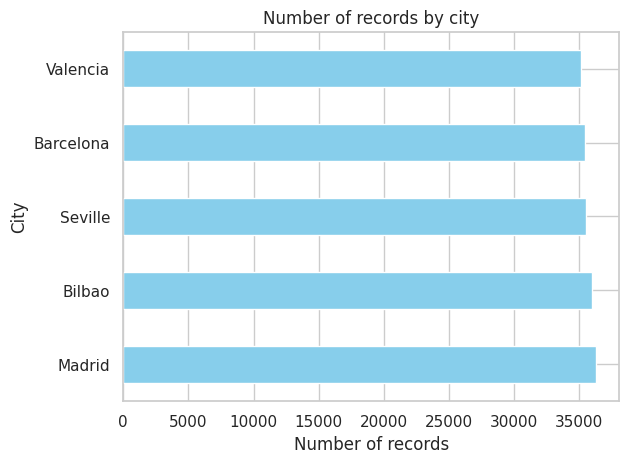

In [7]:
# Horizontal bar chart
df['city_name'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Number of records by city')
plt.xlabel('Number of records')
plt.ylabel('City')
plt.savefig('imgs/city-records-number.png')
plt.show()

### 3. Checking for Missing Values

In [8]:
# Check for null values in the dataset
print("Null values per column:")
print(df.isnull().sum())

# Check for empty strings or other placeholders that might indicate missing data
print("\nChecking for empty strings or special placeholders:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].eq('').sum()} empty strings")

Null values per column:
dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

Checking for empty strings or special placeholders:
dt_iso: 0 empty strings
city_name: 0 empty strings
weather_main: 0 empty strings
weather_description: 0 empty strings
weather_icon: 0 empty strings


Verificamos si hay valores nulos en el dataset. También comprobamos si hay strings vacíos que podrían indicar datos faltantes.

### 4. Temperature Conversion to Celsius

Current temperature statistics (assuming Kelvin):
                temp       temp_min       temp_max
count  178396.000000  178396.000000  178396.000000
mean      289.618605     288.330442     291.091267
std         8.026199       7.955491       8.612454
min       262.240000     262.240000     262.240000
25%       283.670000     282.483602     284.650000
50%       289.150000     288.150000     290.150000
75%       295.150000     293.730125     297.150000
max       315.600000     315.150000     321.150000

Temperature statistics in Celsius:
              temp_c     temp_min_c     temp_max_c
count  178396.000000  178396.000000  178396.000000
mean       16.468605      15.180442      17.941267
std         8.026199       7.955491       8.612454
min       -10.910000     -10.910000     -10.910000
25%        10.520000       9.333602      11.500000
50%        16.000000      15.000000      17.000000
75%        22.000000      20.580125      24.000000
max        42.450000      42.000000      48.000

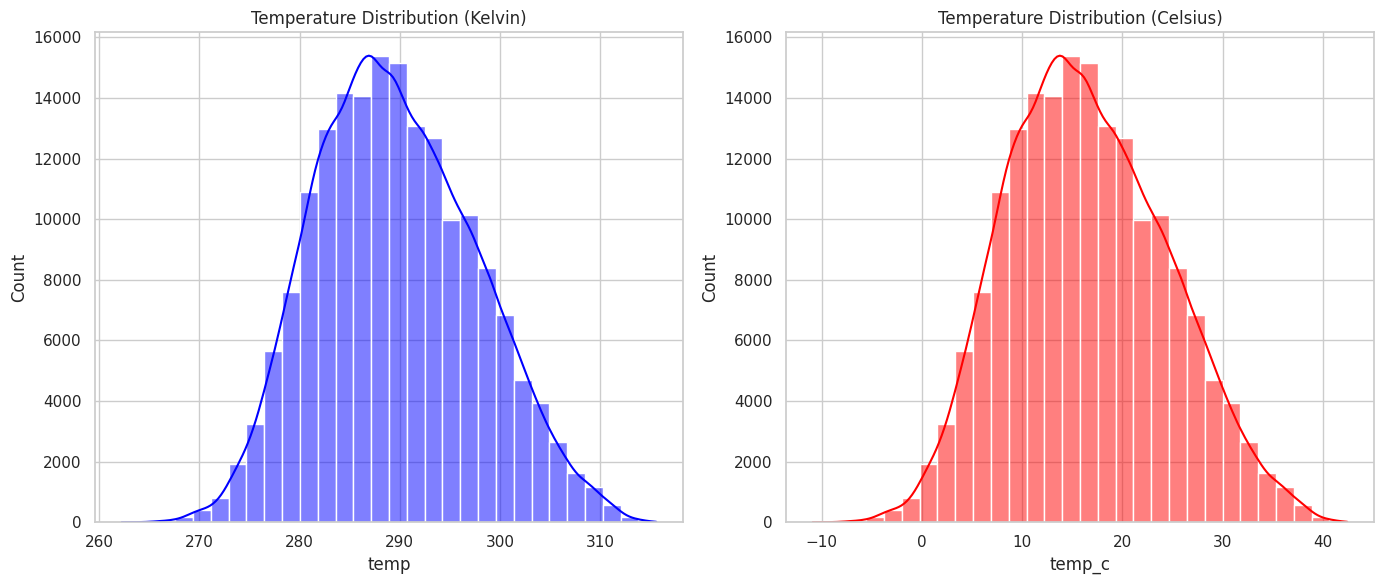


Example temperature conversions:


,dt_iso,temp,temp_c
47274,2016-05-16 14:00:00+02:00,292.14,18.99
104066,2018-08-19 09:00:00+02:00,285.83,12.68
172650,2018-05-10 12:00:00+02:00,291.54,18.39
131223,2017-09-12 06:00:00+02:00,293.65,20.50
41806,2015-10-05 02:00:00+02:00,292.11,18.96


In [9]:
# First, let's check the current temperature range to confirm the unit
print("Current temperature statistics (assuming Kelvin):")
print(df[['temp', 'temp_min', 'temp_max']].describe())

# Function to convert Kelvin to Celsius
def kelvin_to_celsius(k):
    return k - 273.15

# Function to convert Fahrenheit to Celsius (just in case)
def fahrenheit_to_celsius(f):
    return (f - 32) * 5/9

# Create new columns with Celsius temperatures
df['temp_c'] = kelvin_to_celsius(df['temp'])
df['temp_min_c'] = kelvin_to_celsius(df['temp_min'])
df['temp_max_c'] = kelvin_to_celsius(df['temp_max'])

# Verify the conversion
print("\nTemperature statistics in Celsius:")
print(df[['temp_c', 'temp_min_c', 'temp_max_c']].describe())

# Plot the converted temperatures
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['temp'], bins=30, color='blue', label='Kelvin', kde=True)
plt.title('Temperature Distribution (Kelvin)')

plt.subplot(1, 2, 2)
sns.histplot(df['temp_c'], bins=30, color='red', label='Celsius', kde=True)
plt.title('Temperature Distribution (Celsius)')
plt.tight_layout()
plt.savefig('imgs/kelvin-celsius-temp.png')
plt.show()


# Show some example conversions
print("\nExample temperature conversions:")
sample = df.sample(5)[['dt_iso', 'temp', 'temp_c']]
display(sample)

- Primero verificamos el rango actual de temperaturas para confirmar que están en Kelvin (valores típicos entre 200-330).

- Creamos funciones para convertir Kelvin a Celsius y Fahrenheit a Celsius (esta última por si acaso).

- Añadimos nuevas columnas al DataFrame con las temperaturas en Celsius.

- Verificamos la conversión mostrando estadísticas descriptivas de las nuevas columnas.

- Creamos visualizaciones comparando las distribuciones en Kelvin y Celsius.

- Mostramos algunas conversiones de ejemplo para verificar que los cálculos son correctos.

### 5. Checking for Zero Values (Valid vs Potential Missing Data)

In [10]:
# List of columns where zero might be a valid value (like no rain, no clouds)
valid_zero_cols = ['rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'wind_speed']

# List of columns where zero might indicate missing data
potential_missing_zero_cols = ['pressure', 'humidity', 'temp_c', 'temp_min_c', 'temp_max_c']

# Check zeros in valid zero columns
print("Zero values in columns where zero is valid:")
for col in valid_zero_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({zero_count/len(df)*100:.2f}%)")

# Check zeros in potential missing data columns
print("\nZero values in columns where zero might indicate missing data:")
for col in potential_missing_zero_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")

Zero values in columns where zero is valid:
rain_1h: 159008 zeros (89.13%)
rain_3h: 176541 zeros (98.96%)
snow_3h: 178129 zeros (99.85%)
clouds_all: 82194 zeros (46.07%)
wind_speed: 18490 zeros (10.36%)

Zero values in columns where zero might indicate missing data:
pressure: 2 zeros
humidity: 63 zeros
temp_c: 158 zeros
temp_min_c: 1732 zeros
temp_max_c: 323 zeros


Identificamos columnas donde los ceros son válidos (como ausencia de lluvia) y columnas donde los ceros podrían indicar datos faltantes. Contamos los ceros en cada caso.

=== VALID ZERO ANALYSIS ===

Column: rain_1h
- Zero count: 159008 (89.13%)
- Non-zero count: 19388 (10.87%)


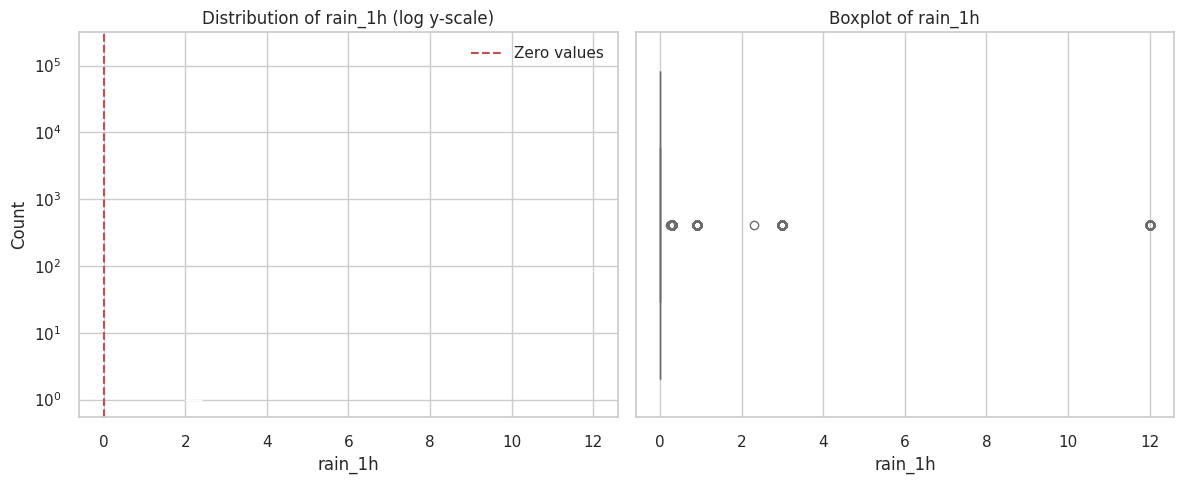


Interpretation:
Zeros in rain_1h represent absence of the phenomenon (e.g., no rain 1h).
The proportion of 89.13% is expected for this variable.

Column: rain_3h
- Zero count: 176541 (98.96%)
- Non-zero count: 1855 (1.04%)


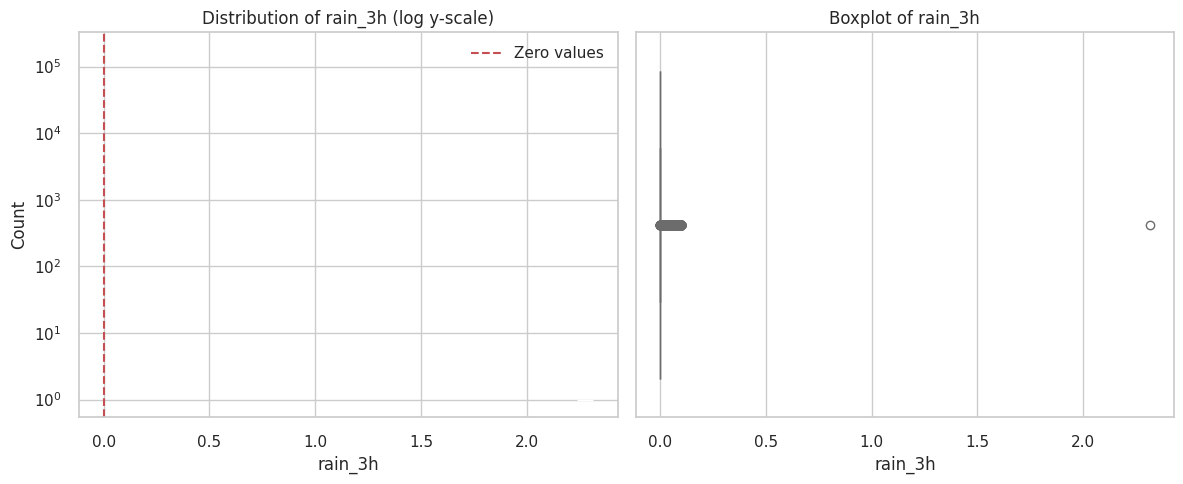


Interpretation:
Zeros in rain_3h represent absence of the phenomenon (e.g., no rain 3h).
The proportion of 98.96% is expected for this variable.

Column: snow_3h
- Zero count: 178129 (99.85%)
- Non-zero count: 267 (0.15%)


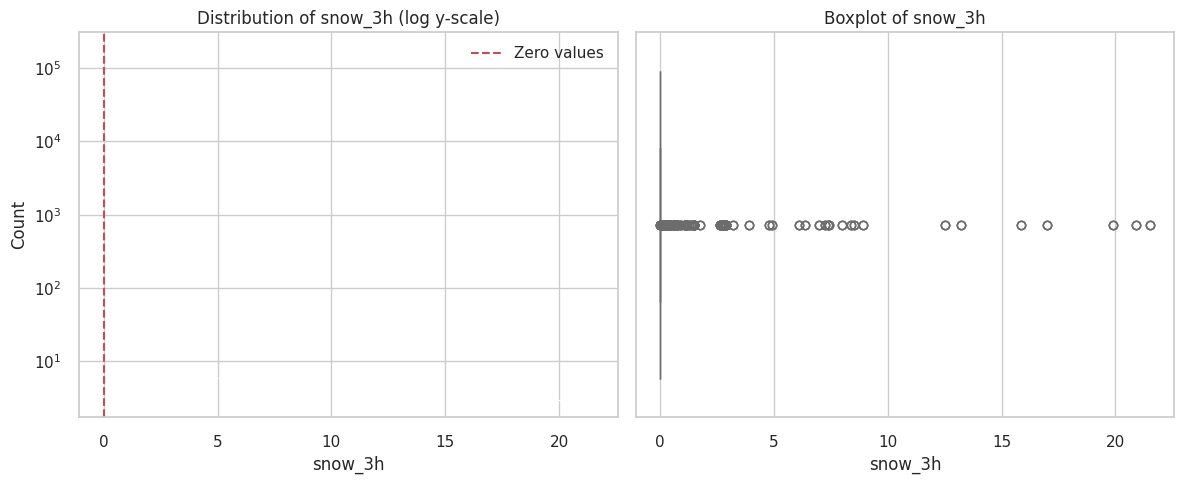


Interpretation:
Zeros in snow_3h represent absence of the phenomenon (e.g., no snow 3h).
The proportion of 99.85% is expected for this variable.

Column: clouds_all
- Zero count: 82194 (46.07%)
- Non-zero count: 96202 (53.93%)


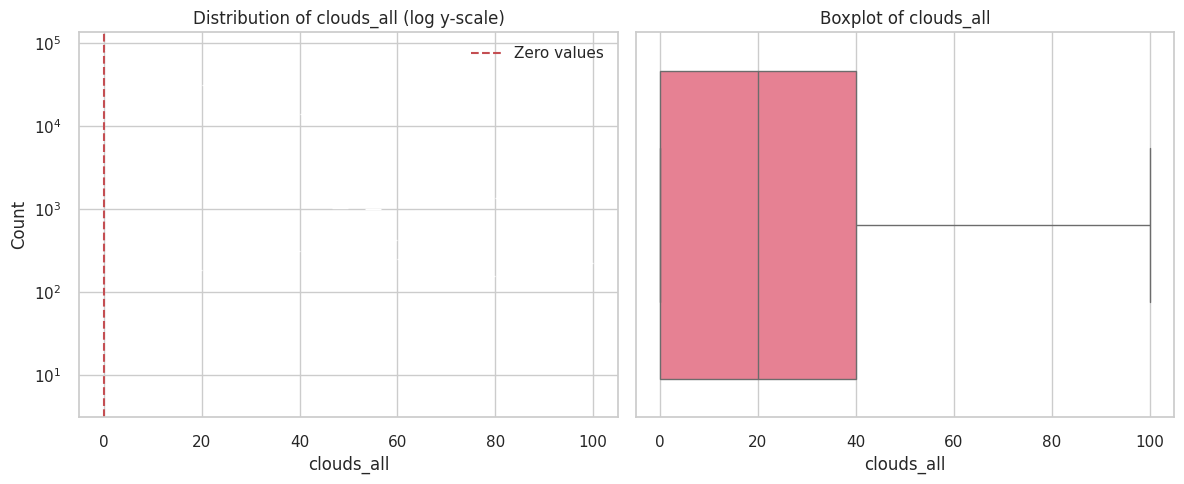


Interpretation:
Zeros in clouds_all represent absence of the phenomenon (e.g., no clouds all).
The proportion of 46.07% is expected for this variable.

Column: wind_speed
- Zero count: 18490 (10.36%)
- Non-zero count: 159906 (89.64%)


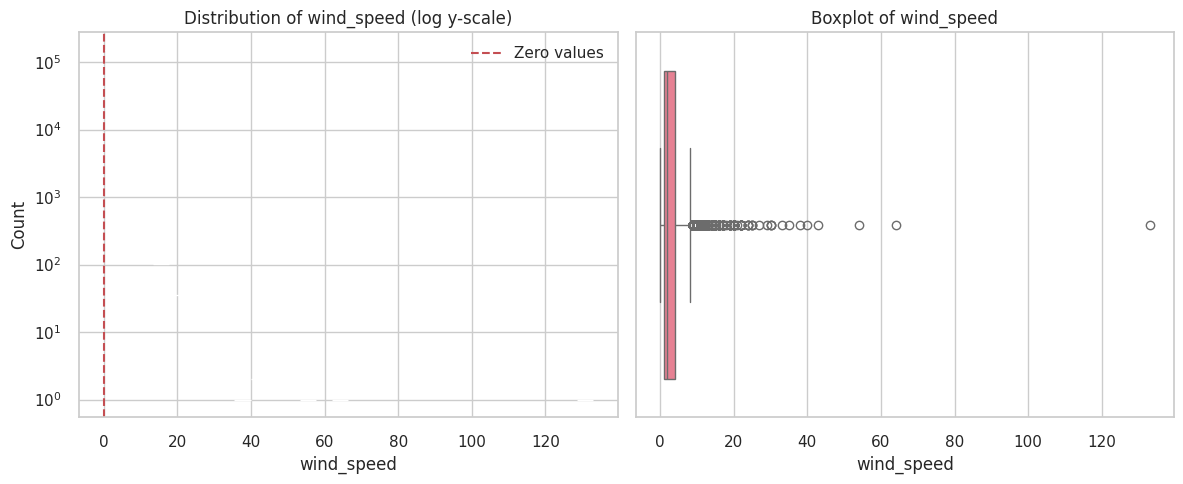


Interpretation:
Zeros in wind_speed represent absence of the phenomenon (e.g., no wind speed).
The proportion of 10.36% is expected for this variable.

=== POTENTIAL MISSING DATA ANALYSIS ===

Column: pressure
- Zero count: 2 (0.00%)


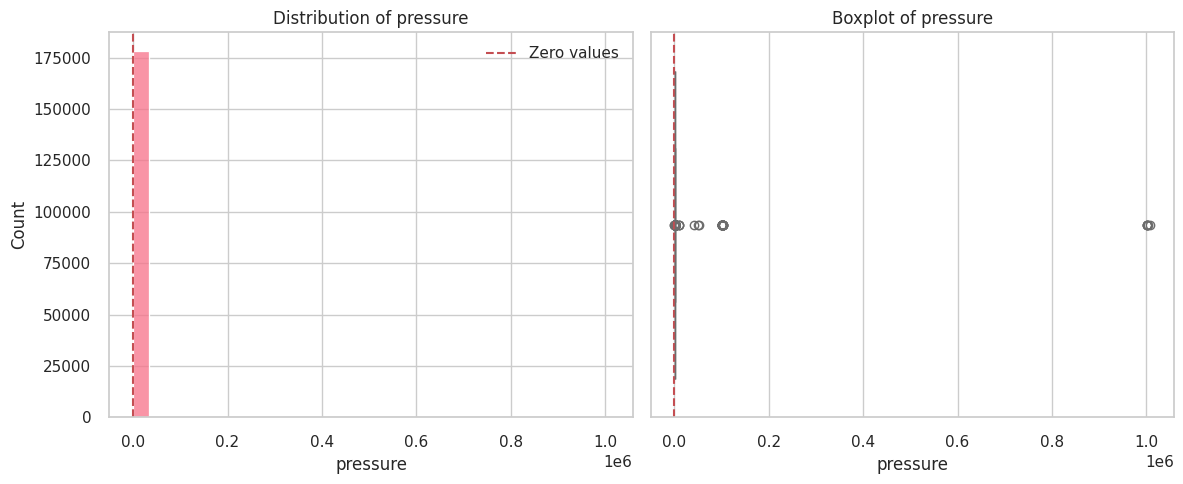


Interpretation:
WARNING! pressure contains 2 zeros that likely represent missing data.
These values are physically impossible for this variable:
- Atmospheric pressure cannot be 0 under normal conditions

Recommendation: These values should be treated as missing values and potentially imputed.

Column: humidity
- Zero count: 63 (0.04%)


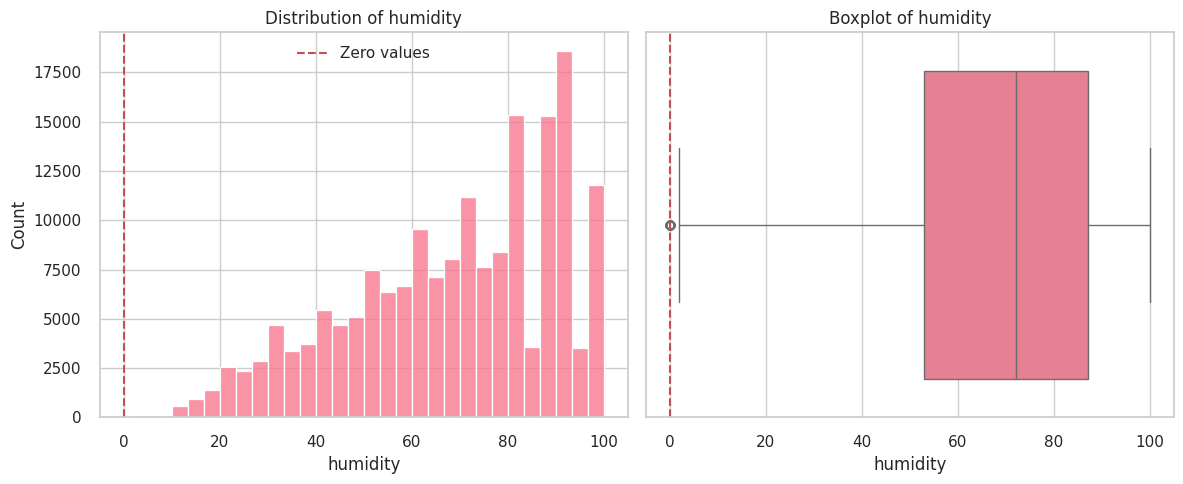


Interpretation:
WARNING! humidity contains 63 zeros that likely represent missing data.
These values are physically impossible for this variable:
- 0% humidity is extremely unlikely in natural conditions

Recommendation: These values should be treated as missing values and potentially imputed.

Column: temp_c
- Zero count: 158 (0.09%)


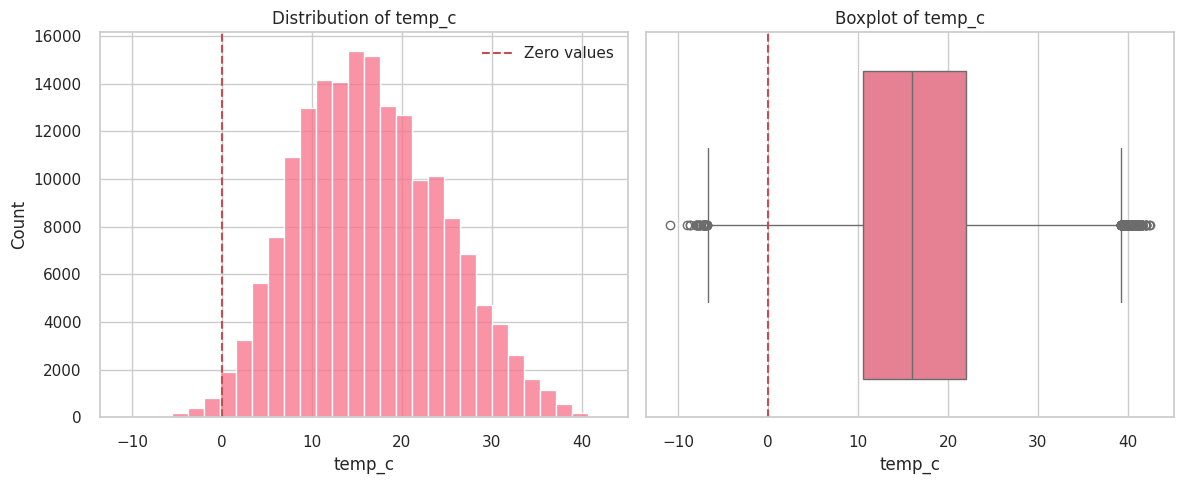


Interpretation:
WARNING! temp_c contains 158 zeros that likely represent missing data.
These values are physically impossible for this variable:
- Temperature is never exactly 0°C in all records

Recommendation: These values should be treated as missing values and potentially imputed.

Column: temp_min_c
- Zero count: 1732 (0.97%)


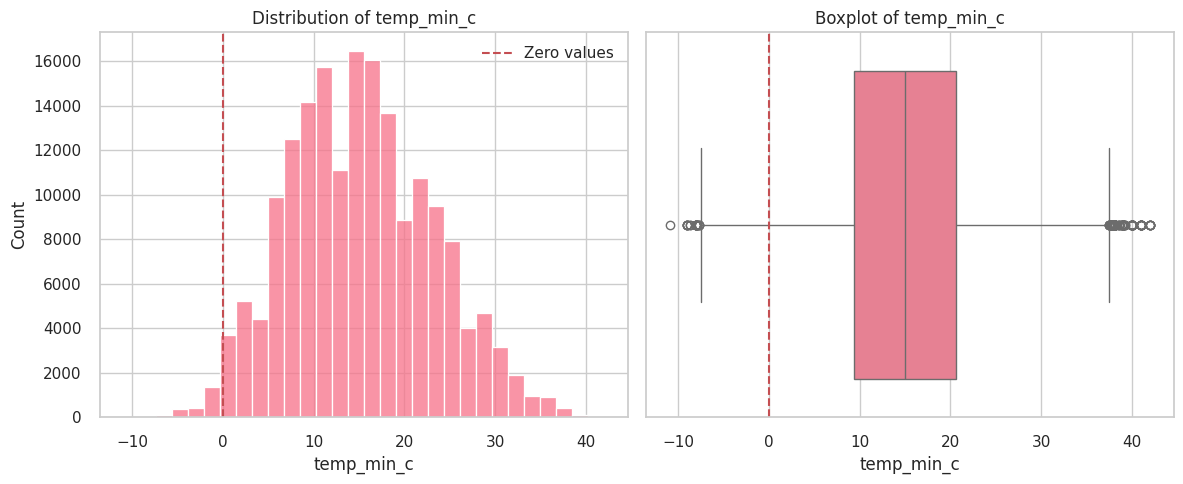


Interpretation:
WARNING! temp_min_c contains 1732 zeros that likely represent missing data.
These values are physically impossible for this variable:
- Temperature is never exactly 0°C in all records

Recommendation: These values should be treated as missing values and potentially imputed.

Column: temp_max_c
- Zero count: 323 (0.18%)


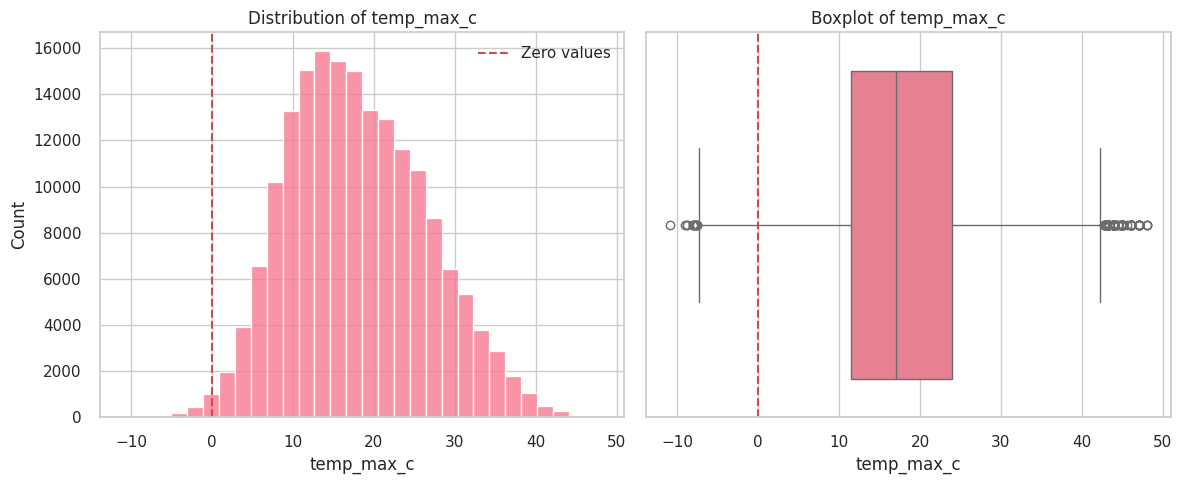


Interpretation:
WARNING! temp_max_c contains 323 zeros that likely represent missing data.
These values are physically impossible for this variable:
- Temperature is never exactly 0°C in all records

Recommendation: These values should be treated as missing values and potentially imputed.

=== ANALYSIS COMPLETED ===


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style configuration
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")
sns.set_palette("husl")

# Columns where zero is a valid value
valid_zero_cols = ['rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'wind_speed']

print("=== VALID ZERO ANALYSIS ===")
for col in valid_zero_cols:
    zero_count = (df[col] == 0).sum()
    non_zero_count = len(df) - zero_count
    
    print(f"\nColumn: {col}")
    print(f"- Zero count: {zero_count} ({zero_count/len(df)*100:.2f}%)")
    print(f"- Non-zero count: {non_zero_count} ({non_zero_count/len(df)*100:.2f}%)")
    
    # Distribution plot (logarithmic histogram for better visualization)
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, log_scale=(False, True))
    plt.axvline(0, color='r', linestyle='--', label='Zero values')
    plt.title(f'Distribution of {col} (log y-scale)')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Interpretation
    print("\nInterpretation:")
    print(f"Zeros in {col} represent absence of the phenomenon (e.g., no {col.replace('_',' ')}).")
    print(f"The proportion of {zero_count/len(df)*100:.2f}% is expected for this variable.")

# Columns where zero might indicate missing data
potential_missing_zero_cols = ['pressure', 'humidity', 'temp_c', 'temp_min_c', 'temp_max_c']

print("\n=== POTENTIAL MISSING DATA ANALYSIS ===")
for col in potential_missing_zero_cols:
    zero_count = (df[col] == 0).sum()
    
    print(f"\nColumn: {col}")
    print(f"- Zero count: {zero_count} ({zero_count/len(df)*100:.2f}%)")
    
    # Distribution plot with zoom near zero
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30)
    plt.axvline(0, color='r', linestyle='--', label='Zero values')
    plt.title(f'Distribution of {col}')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.axvline(0, color='r', linestyle='--')
    
    plt.tight_layout()
    plt.savefig(f'imgs/{col}.png')
    plt.show()
    
    # Interpretation
    print("\nInterpretation:")
    if zero_count > 0:
        print(f"WARNING! {col} contains {zero_count} zeros that likely represent missing data.")
        print("These values are physically impossible for this variable:")
        if 'temp' in col:
            print("- Temperature is never exactly 0°C in all records")
        elif col == 'humidity':
            print("- 0% humidity is extremely unlikely in natural conditions")
        elif col == 'pressure':
            print("- Atmospheric pressure cannot be 0 under normal conditions")
        
        print("\nRecommendation: These values should be treated as missing values and potentially imputed.")
    else:
        print(f"No zeros found in {col} - data appears clean for this variable.")

print("\n=== ANALYSIS COMPLETED ===")

### 6. Data Type Verification and Conversion

In [12]:
# Convert dt_iso to datetime format
df['dt_iso'] = pd.to_datetime(df['dt_iso'], utc=True)

# Extract date and time components for analysis
df['date'] = df['dt_iso'].dt.date
df['hour'] = df['dt_iso'].dt.hour
df['month'] = df['dt_iso'].dt.month
df['year'] = df['dt_iso'].dt.year

# Verify conversion
print("\nData types after conversion:")
print(df[['dt_iso', 'date', 'hour', 'month', 'year']].dtypes)


Data types after conversion:
dt_iso    datetime64[ns, UTC]
date                   object
hour                    int32
month                   int32
year                    int32
dtype: object


Convertimos la columna de fecha a formato datetime y extraemos componentes útiles (hora, mes, año) para análisis posteriores.

### 7. Descriptive Statistics

In [13]:
# Numerical columns statistics
print("Descriptive statistics for numerical columns:")
display(df.describe().transpose())

# Categorical columns statistics
categorical_cols = ['city_name', 'weather_main', 'weather_description', 'weather_icon']
print("\nValue counts for categorical columns:")
for col in categorical_cols:
    #print(f"\n{col}:")
    print(df[col].value_counts())

Descriptive statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
temp,178396.0,289.618605,8.026199,262.24,283.670000,289.15,295.150000,315.600
temp_min,178396.0,288.330442,7.955491,262.24,282.483602,288.15,293.730125,315.150
temp_max,178396.0,291.091267,8.612454,262.24,284.650000,290.15,297.150000,321.150
pressure,178396.0,1069.260740,5969.631893,0.00,1013.000000,1018.00,1022.000000,1008371.000
humidity,178396.0,68.423457,21.902888,0.00,53.000000,72.00,87.000000,100.000
wind_speed,178396.0,2.470560,2.095910,0.00,1.000000,2.00,4.000000,133.000
wind_deg,178396.0,166.591190,116.611927,0.00,55.000000,177.00,270.000000,360.000
rain_1h,178396.0,0.075492,0.398847,0.00,0.000000,0.00,0.000000,12.000
rain_3h,178396.0,0.000380,0.007288,0.00,0.000000,0.00,0.000000,2.315
snow_3h,178396.0,0.004763,0.222604,0.00,0.000000,0.00,0.000000,21.500



Value counts for categorical columns:
city_name
Madrid       36267
Bilbao       35951
Seville      35557
Barcelona    35476
Valencia     35145
Name: count, dtype: int64
weather_main
clear           82685
clouds          68055
rain            17391
mist             3908
fog              2506
drizzle          1724
thunderstorm     1041
haze              435
dust              347
snow              270
smoke              33
squall              1
Name: count, dtype: int64
weather_description
sky is clear                    82685
few clouds                      32101
broken clouds                   17448
scattered clouds                15945
light rain                      10905
mist                             3908
moderate rain                    3621
overcast clouds                  2561
fog                              2506
light intensity drizzle          1241
heavy intensity rain             1142
light intensity shower rain       657
proximity thunderstorm            480
proximity sho

Visualizations for numerical columns:

Column: temp


,count,mean,std,min,25%,50%,75%,max
temp,178396.0,289.618605,8.026199,262.24,283.67,289.15,295.15,315.6


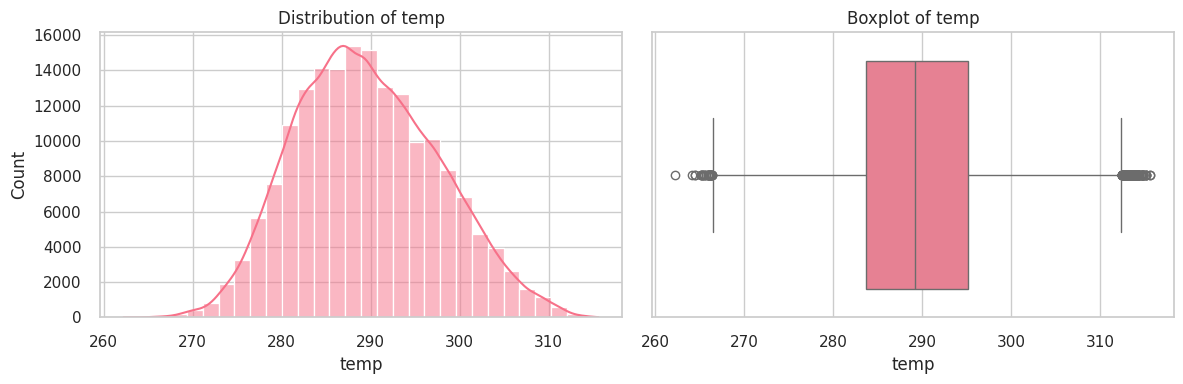


Column: temp_min


,count,mean,std,min,25%,50%,75%,max
temp_min,178396.0,288.330442,7.955491,262.24,282.483602,288.15,293.730125,315.15


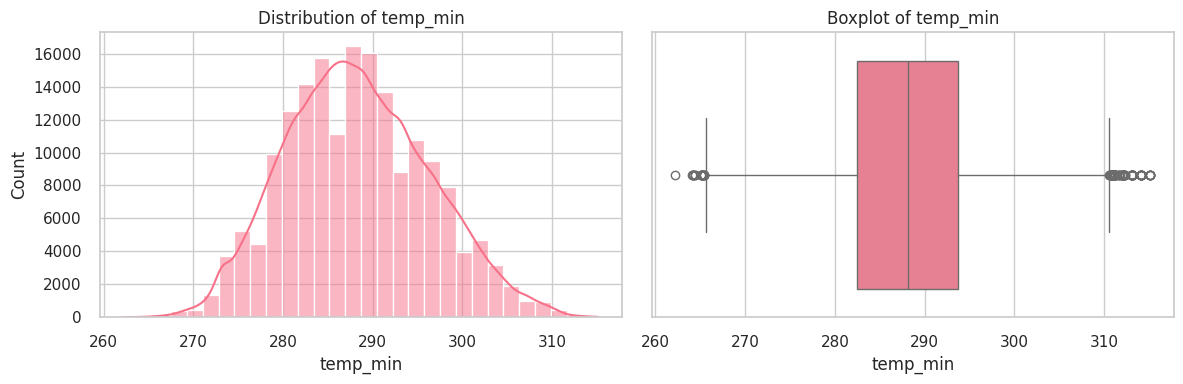


Column: temp_max


,count,mean,std,min,25%,50%,75%,max
temp_max,178396.0,291.091267,8.612454,262.24,284.65,290.15,297.15,321.15


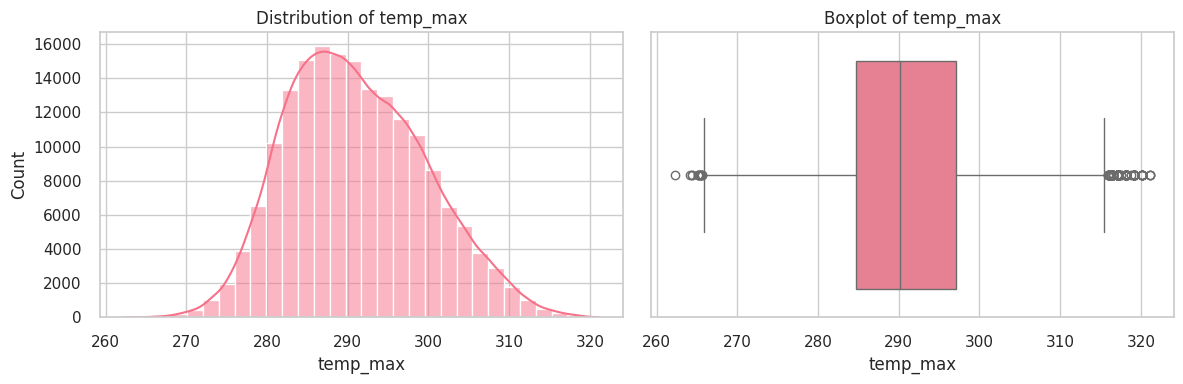


Column: pressure


,count,mean,std,min,25%,50%,75%,max
pressure,178396.0,1069.26074,5969.631893,0.0,1013.0,1018.0,1022.0,1008371.0


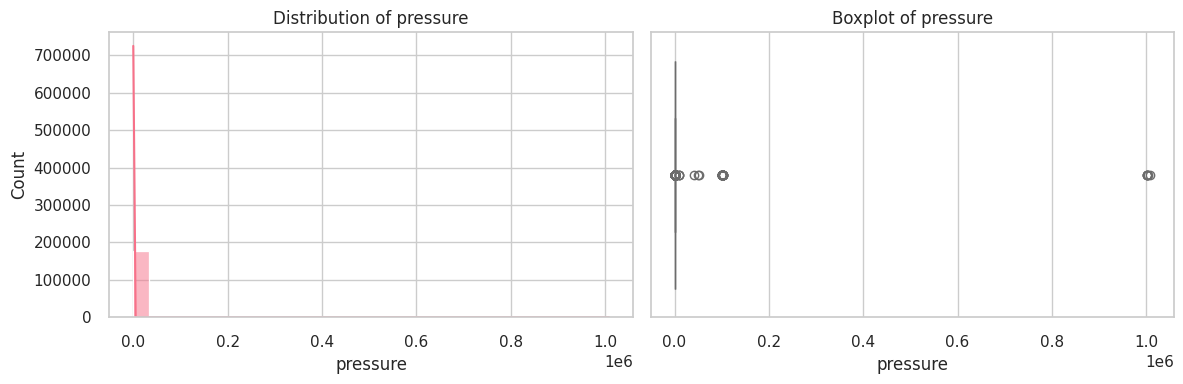


Column: humidity


,count,mean,std,min,25%,50%,75%,max
humidity,178396.0,68.423457,21.902888,0.0,53.0,72.0,87.0,100.0


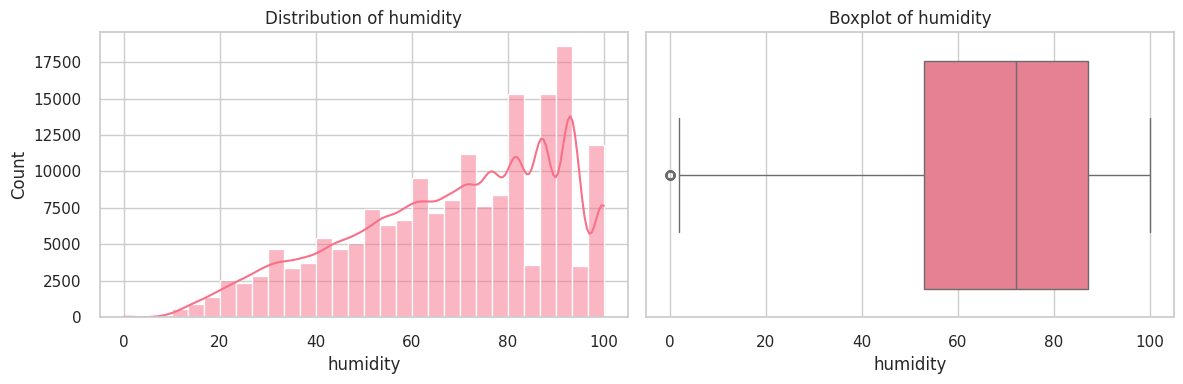


Column: wind_speed


,count,mean,std,min,25%,50%,75%,max
wind_speed,178396.0,2.47056,2.09591,0.0,1.0,2.0,4.0,133.0


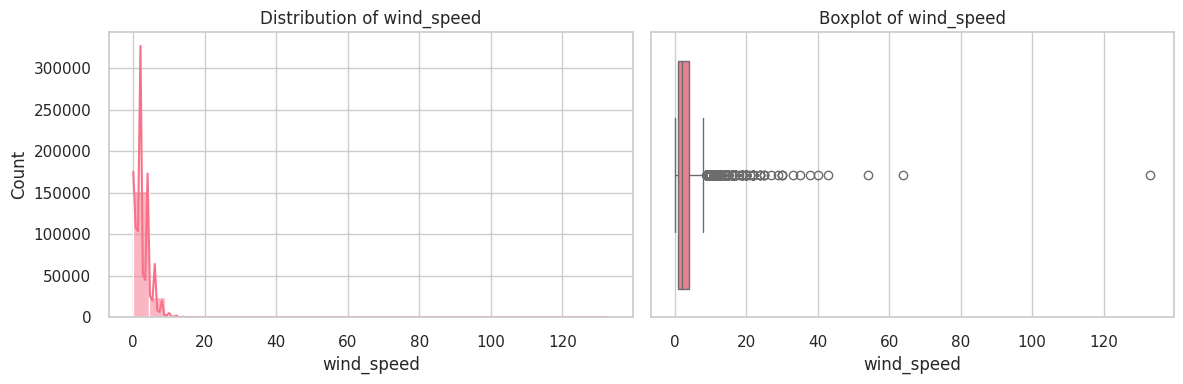


Column: wind_deg


,count,mean,std,min,25%,50%,75%,max
wind_deg,178396.0,166.59119,116.611927,0.0,55.0,177.0,270.0,360.0


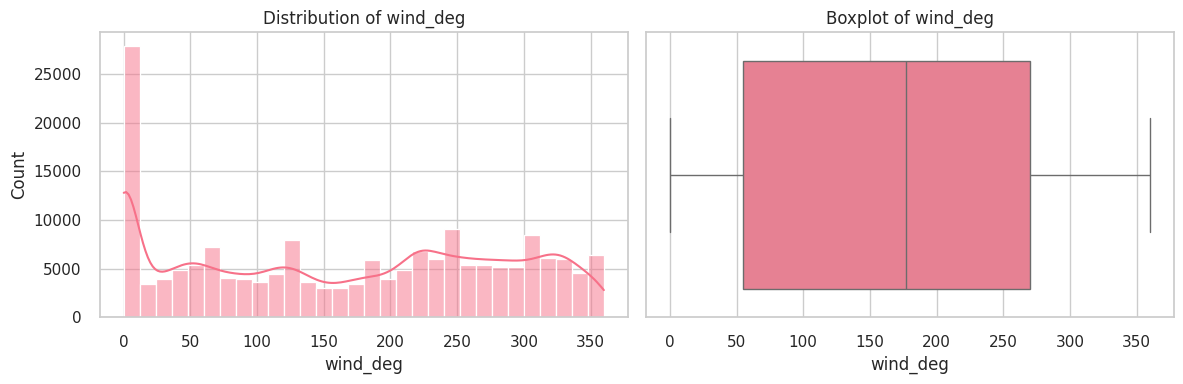


Column: rain_1h


,count,mean,std,min,25%,50%,75%,max
rain_1h,178396.0,0.075492,0.398847,0.0,0.0,0.0,0.0,12.0


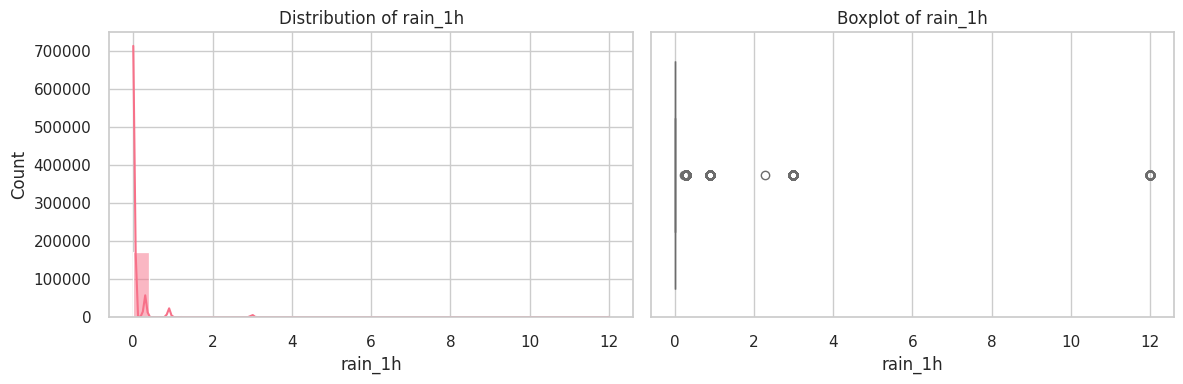


Column: rain_3h


,count,mean,std,min,25%,50%,75%,max
rain_3h,178396.0,0.00038,0.007288,0.0,0.0,0.0,0.0,2.315


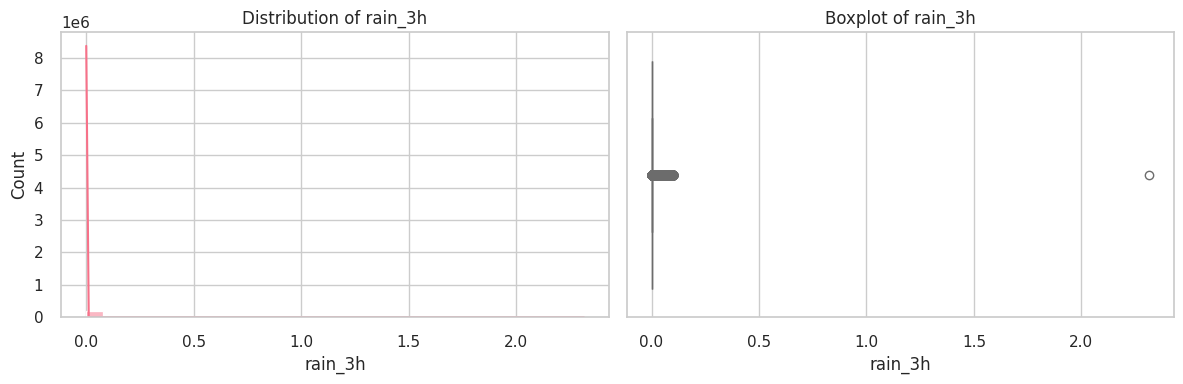


Column: snow_3h


,count,mean,std,min,25%,50%,75%,max
snow_3h,178396.0,0.004763,0.222604,0.0,0.0,0.0,0.0,21.5


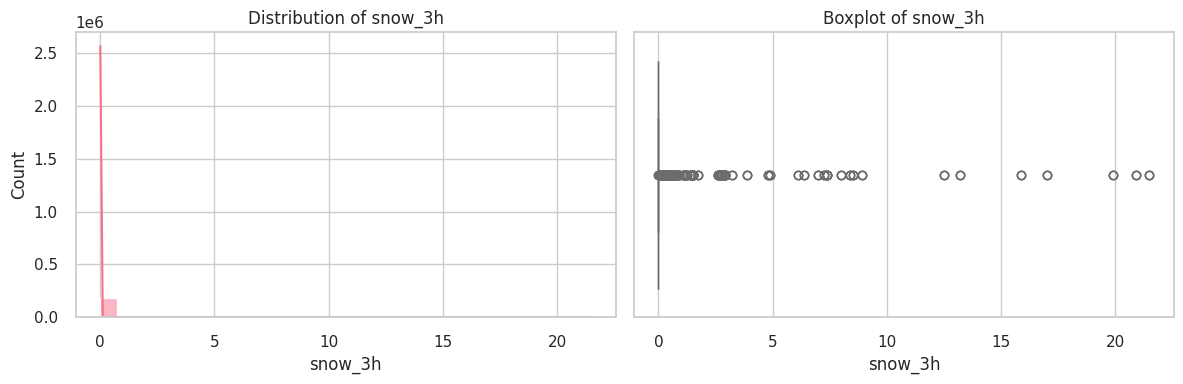


Column: clouds_all


,count,mean,std,min,25%,50%,75%,max
clouds_all,178396.0,25.073292,30.774129,0.0,0.0,20.0,40.0,100.0


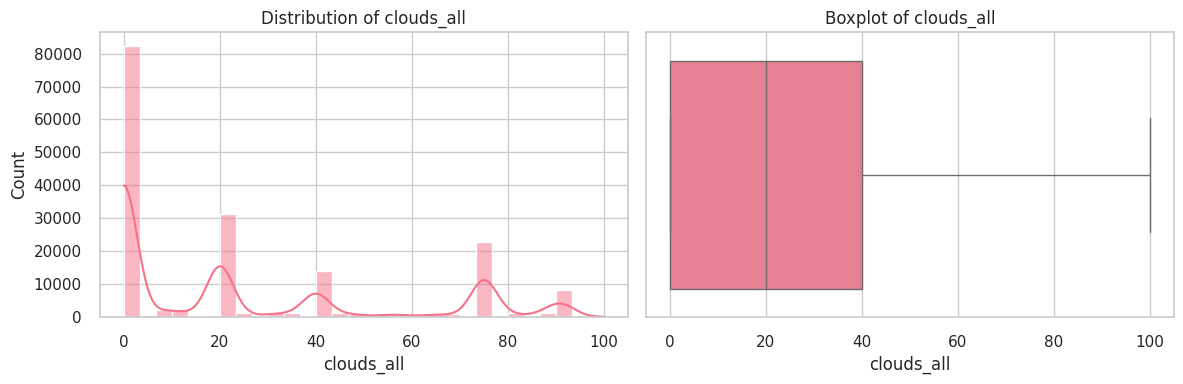


Column: weather_id


,count,mean,std,min,25%,50%,75%,max
weather_id,178396.0,759.831902,108.733223,200.0,800.0,800.0,801.0,804.0


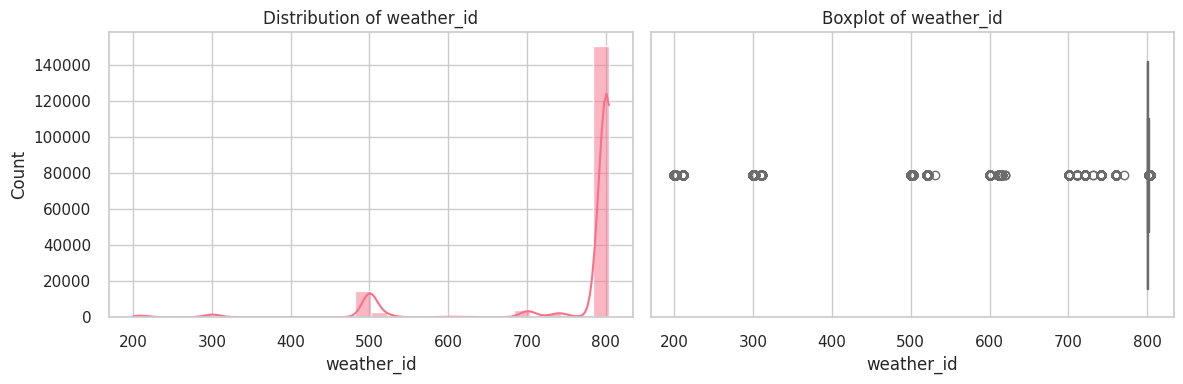


Column: temp_c


,count,mean,std,min,25%,50%,75%,max
temp_c,178396.0,16.468605,8.026199,-10.91,10.52,16.0,22.0,42.45


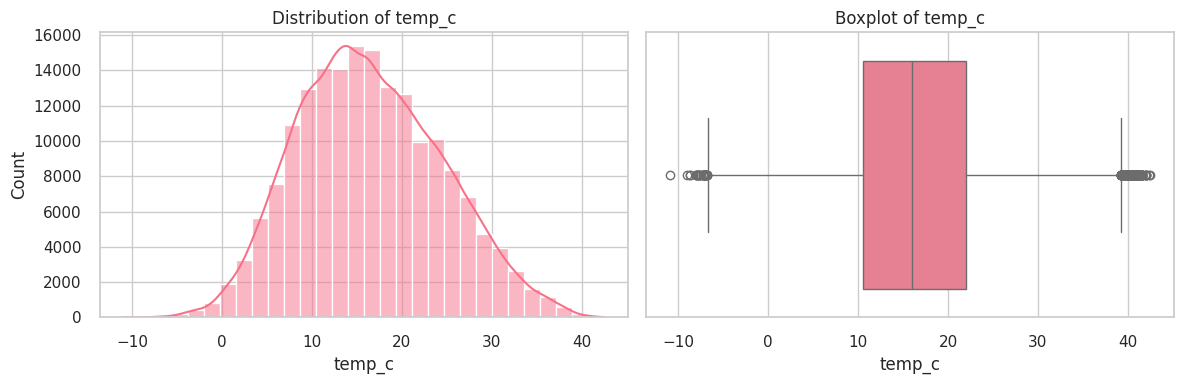


Column: temp_min_c


,count,mean,std,min,25%,50%,75%,max
temp_min_c,178396.0,15.180442,7.955491,-10.91,9.333602,15.0,20.580125,42.0


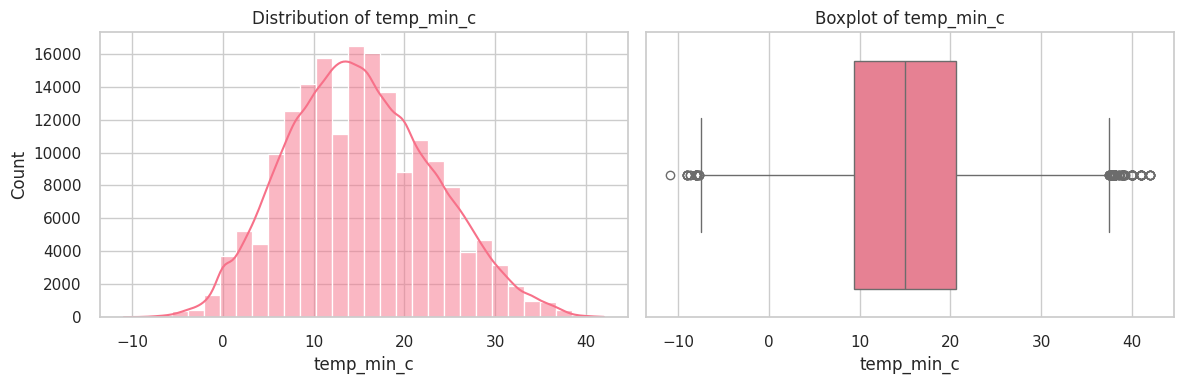


Column: temp_max_c


,count,mean,std,min,25%,50%,75%,max
temp_max_c,178396.0,17.941267,8.612454,-10.91,11.5,17.0,24.0,48.0


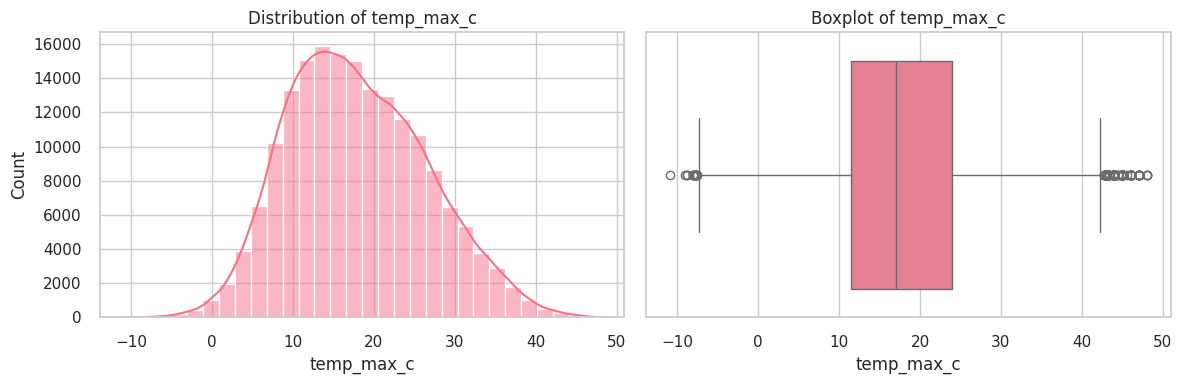


Visualizations for categorical columns:

Column: city_name


,count
city_name,
Madrid,36267
Bilbao,35951
Seville,35557
Barcelona,35476
Valencia,35145


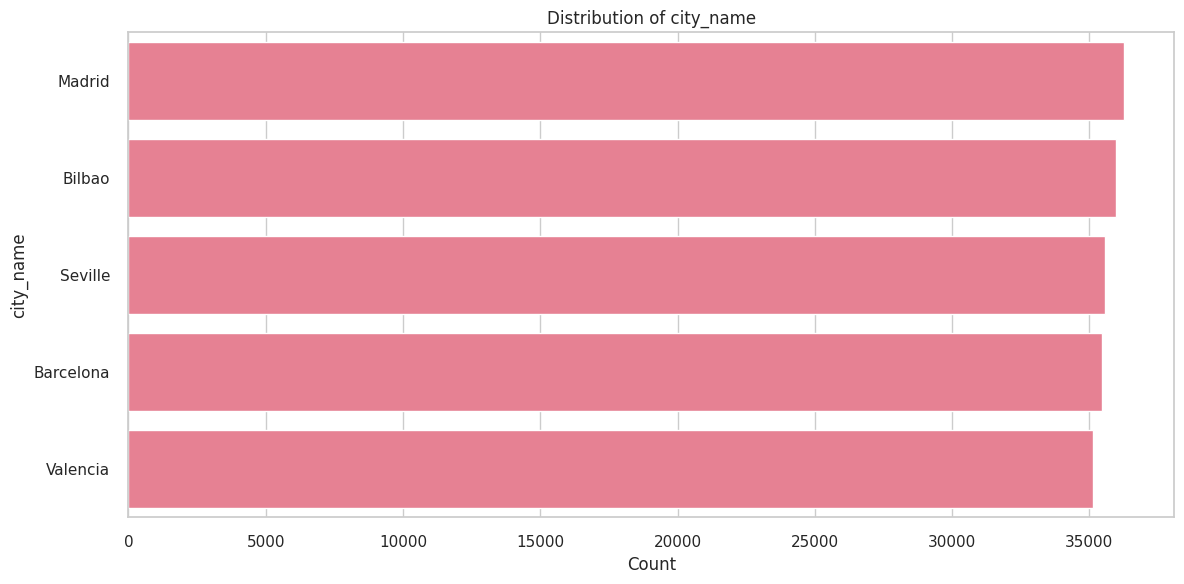


Column: weather_main


,count
weather_main,
clear,82685
clouds,68055
rain,17391
mist,3908
fog,2506
drizzle,1724
thunderstorm,1041
haze,435
dust,347


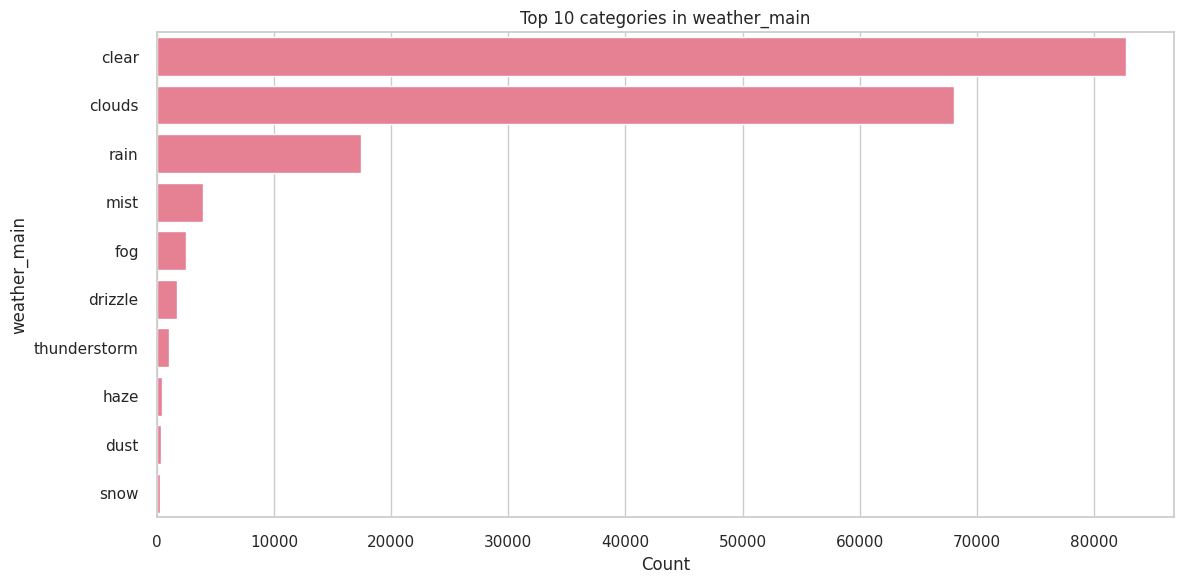


Column: weather_description


,count
weather_description,
sky is clear,82685
few clouds,32101
broken clouds,17448
scattered clouds,15945
light rain,10905
mist,3908
moderate rain,3621
overcast clouds,2561
fog,2506


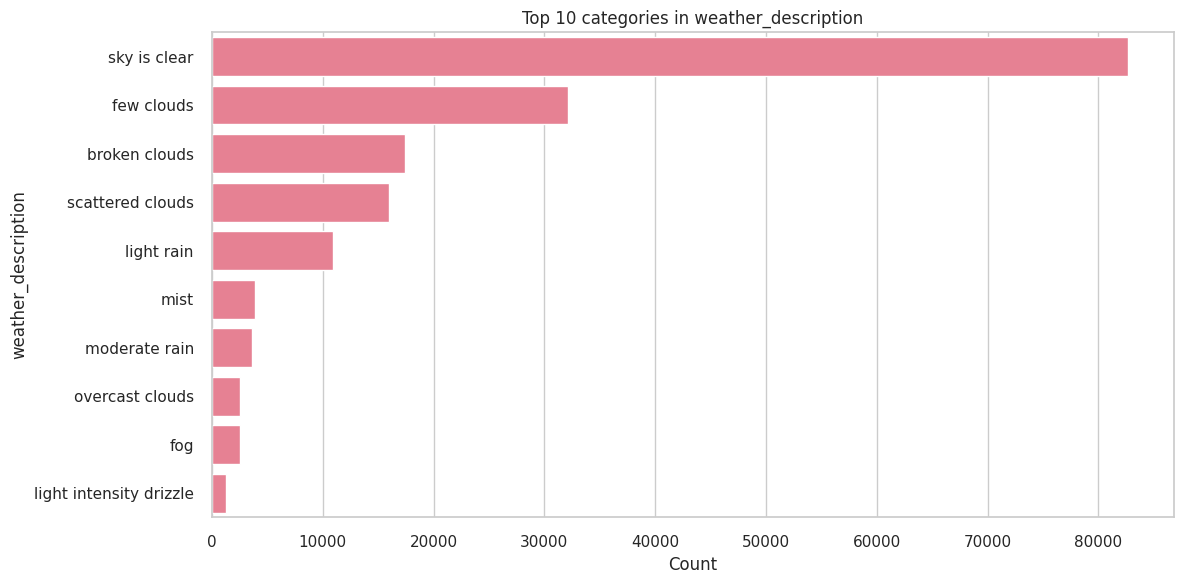


Column: weather_icon


,count
weather_icon,
01n,38541
01d,34830
02d,19199
02n,12368
04d,9137
04n,8403
03d,7870
10n,5951
1,5946


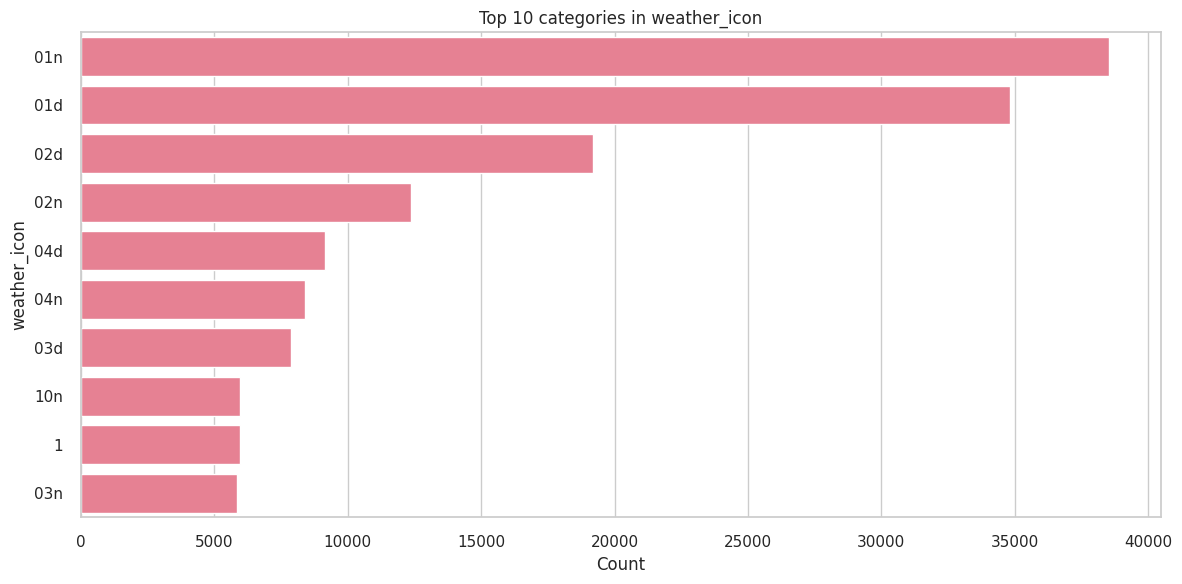

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style configuration for plots
plt.style.use('seaborn-v0_8')  # Using the most recent seaborn style
sns.set_theme(style="whitegrid")  # Style for seaborn
sns.set_palette("husl")

# Numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("Visualizations for numerical columns:")
for col in numerical_cols:
    print(f"\nColumn: {col}")
    display(df[col].describe().to_frame().T)
    
    plt.figure(figsize=(12, 4))
    
    # Distribution plot (histogram + KDE)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

# Categorical columns
categorical_cols = ['city_name', 'weather_main', 'weather_description', 'weather_icon']

print("\nVisualizations for categorical columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    value_counts = df[col].value_counts()
    display(value_counts.to_frame())
    
    plt.figure(figsize=(12, 6))
    
    # Bar plot for main categories
    if len(value_counts) > 10:
        # If there are many categories, show only top 10
        top_10 = value_counts.head(10)
        sns.barplot(x=top_10.values, y=top_10.index)
        plt.title(f'Top 10 categories in {col}')
    else:
        sns.barplot(x=value_counts.values, y=value_counts.index)
        plt.title(f'Distribution of {col}')
    
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Mostramos estadísticas descriptivas para las columnas numéricas y recuentos de valores para las categóricas.

### 8. Temporal Analysis

### Análisis de Distribución Horaria

Distribution of records by hour of day:
hour_only
0     7410
1     7391
2     7419
3     7430
4     7435
5     7450
6     7478
7     7515
8     7528
9     7505
10    7475
11    7464
12    7420
13    7423
14    7427
15    7414
16    7409
17    7430
18    7430
19    7409
20    7397
21    7374
22    7383
23    7380
Name: count, dtype: int64


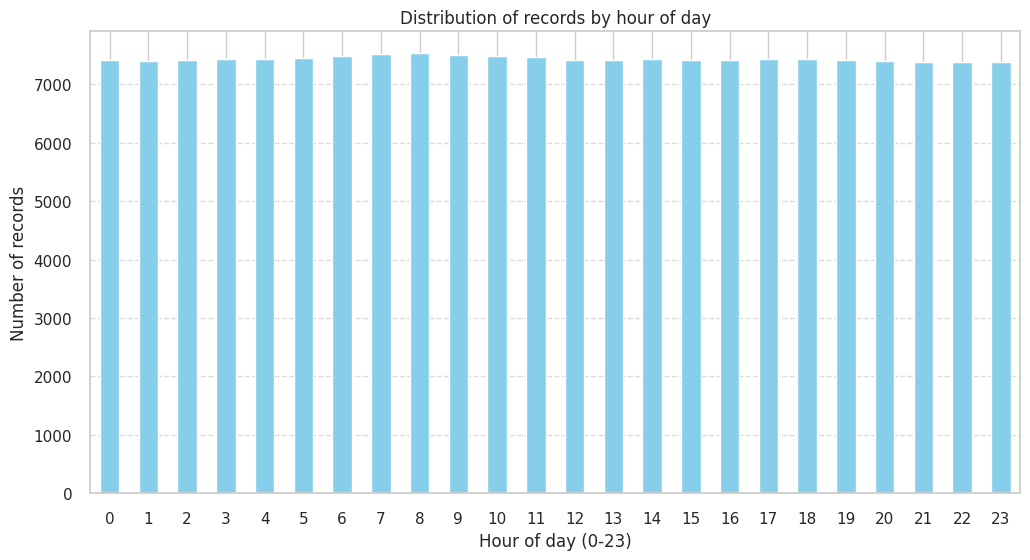


Visualization saved as 'imgs/hourly_distribution.png'


In [15]:
import matplotlib.pyplot as plt
import os

# Create directory for images if it doesn't exist
os.makedirs('imgs', exist_ok=True)

# Extract only the hour from timestamp (already converted to UTC)
df['hour_only'] = df['dt_iso'].dt.hour

# Count frequency of each hour
hourly_distribution = df['hour_only'].value_counts().sort_index()

# Display results
print("Distribution of records by hour of day:")
print(hourly_distribution)

# Visualization
plt.figure(figsize=(12, 6))
hourly_distribution.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of records by hour of day')
plt.xlabel('Hour of day (0-23)')
plt.ylabel('Number of records')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('imgs/hourly_distribution.png')  # Save the figure
plt.show()
plt.close()  # Close the figure to free memory

print("\nVisualization saved as 'imgs/hourly_distribution.png'")

In [16]:
print(df.columns.tolist())

['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'weather_id', 'weather_main', 'weather_description', 'weather_icon', 'temp_c', 'temp_min_c', 'temp_max_c', 'date', 'hour', 'month', 'year', 'hour_only']


### Análisis de Compleción Horaria por Día

In [17]:
# Create pivot table to view recorded hours by day
hour_coverage = df.pivot_table(index='dt_iso', 
                              columns='hour_only', 
                              aggfunc='size', 
                              fill_value=0)

# Display summary
print("\nHourly coverage summary:")
print(f"Total days analyzed: {len(hour_coverage)}")
print(f"Days with all 24 hours recorded: {(hour_coverage.sum(axis=1) == 24).sum()}")

# Check days with missing hours
missing_hours_per_day = 24 - hour_coverage.sum(axis=1)
print(f"\nDays with missing hours: {(missing_hours_per_day > 0).sum()}")
print("Example of days with missing hours:")
display(missing_hours_per_day[missing_hours_per_day > 0].head())


Hourly coverage summary:
Total days analyzed: 35064
Days with all 24 hours recorded: 0

Days with missing hours: 35064
Example of days with missing hours:


dt_iso
2014-12-31 23:00:00+00:00    19
2015-01-01 00:00:00+00:00    19
2015-01-01 01:00:00+00:00    19
2015-01-01 02:00:00+00:00    19
2015-01-01 03:00:00+00:00    19
dtype: int64

### 9. Temperature Analysis

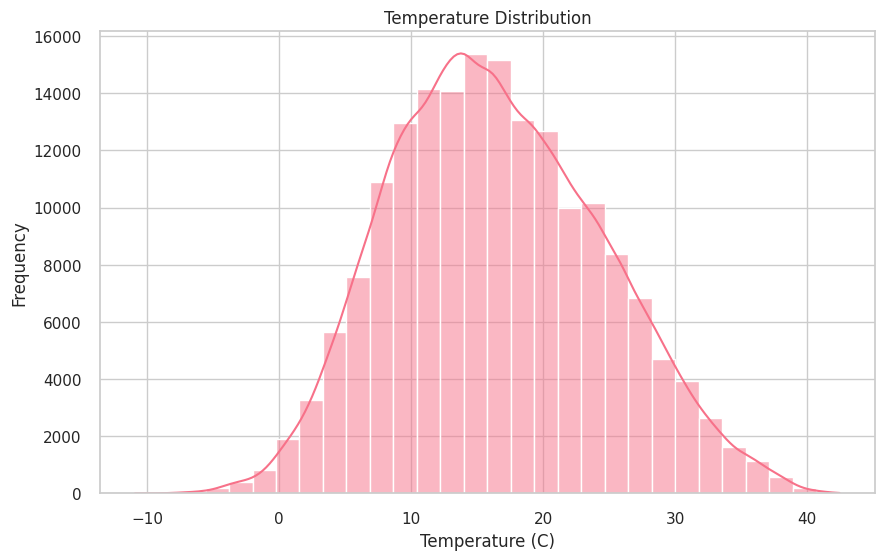

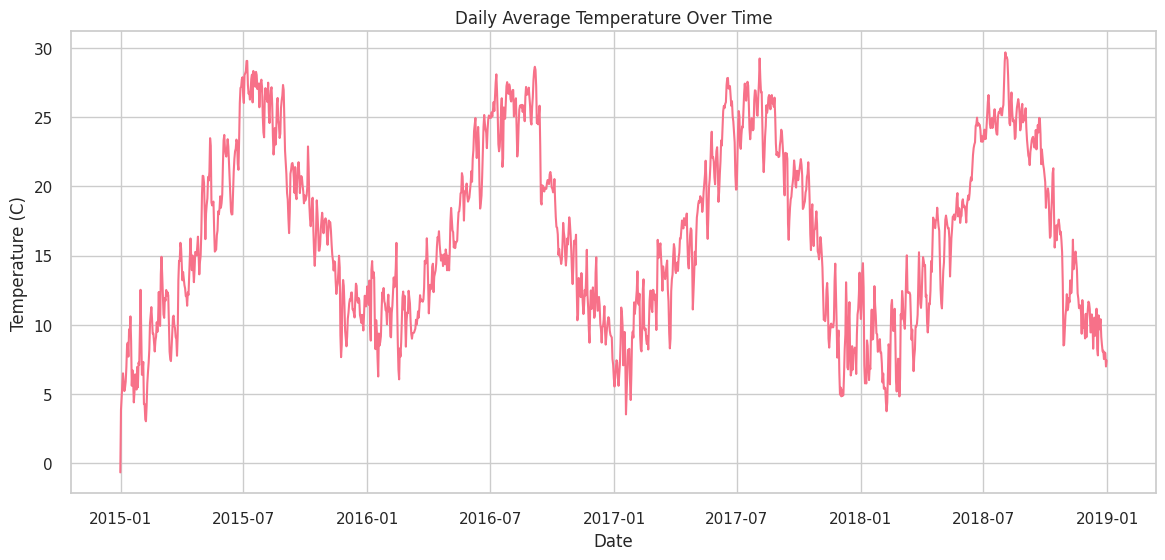

In [18]:
# Plot temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['temp_c'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.savefig('imgs/temp-celsius-distribution.png')
plt.show()

# Temperature trends over time
plt.figure(figsize=(14, 6))
df.groupby('date')['temp_c'].mean().plot()
plt.title('Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.savefig('imgs/dayly-avg-temp-distribution.png')
plt.show()

Visualizamos la distribución de temperaturas y su evolución temporal.

### 10. Weather Conditions Analysis

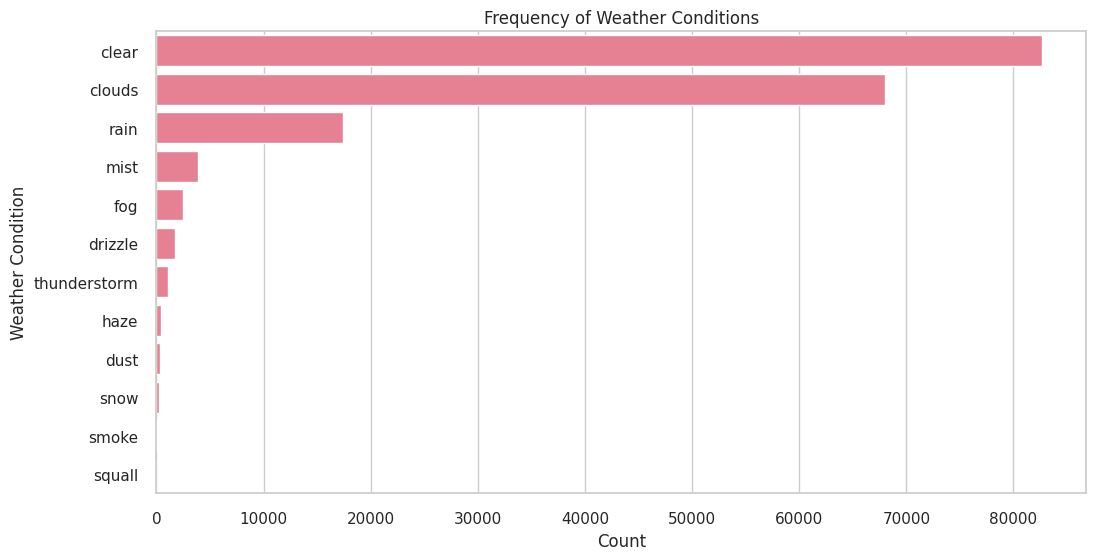

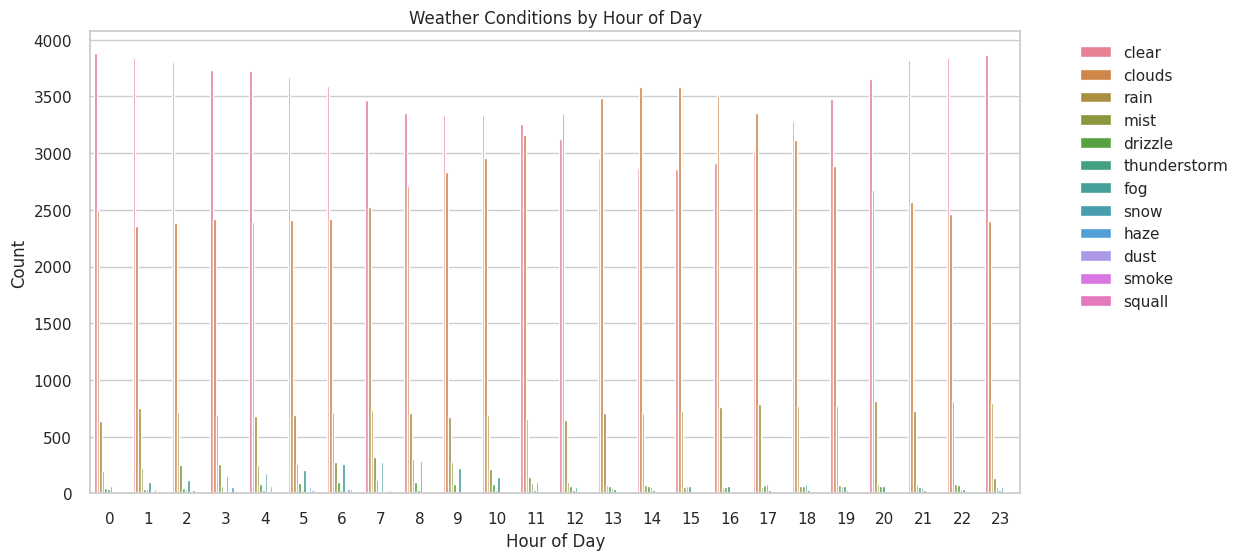

In [19]:
# Plot frequency of different weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(y='weather_main', data=df, order=df['weather_main'].value_counts().index)
plt.title('Frequency of Weather Conditions')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.savefig('imgs/freq-weather-conditions.png')
plt.show()

# Weather conditions by hour of day
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', hue='weather_main', data=df)
plt.title('Weather Conditions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('imgs/day-hour-weather-conditions.png')
plt.show()

Analizamos la frecuencia de diferentes condiciones meteorológicas y cómo varían a lo largo del día.

### 10. Correlation Analysis

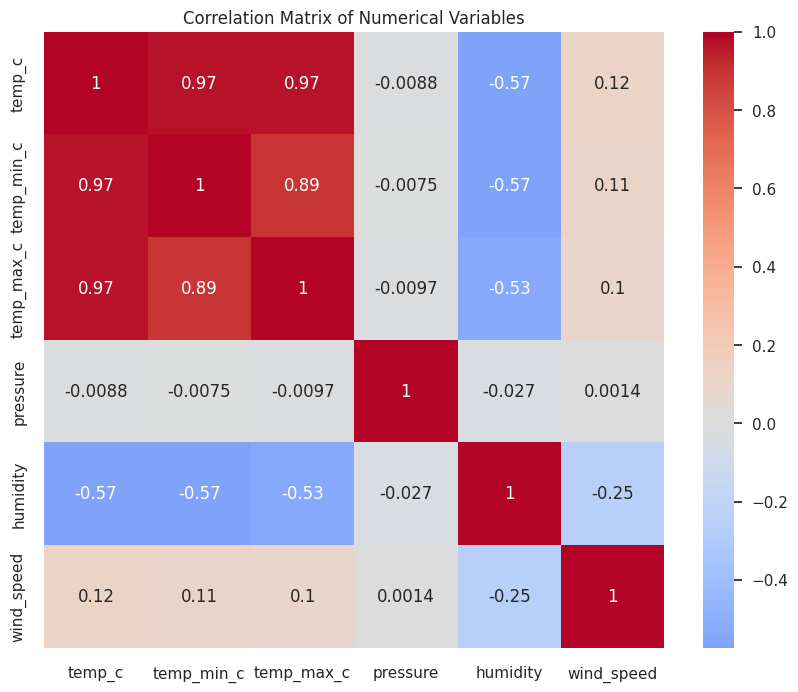

In [20]:
# Calculate correlation matrix
corr_matrix = df[['temp_c', 'temp_min_c', 'temp_max_c', 'pressure', 'humidity', 'wind_speed']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.savefig('imgs/matrix-correlation.png')
plt.show()

Examinamos las correlaciones entre las variables numéricas principales.

### 12. Wind Analysis

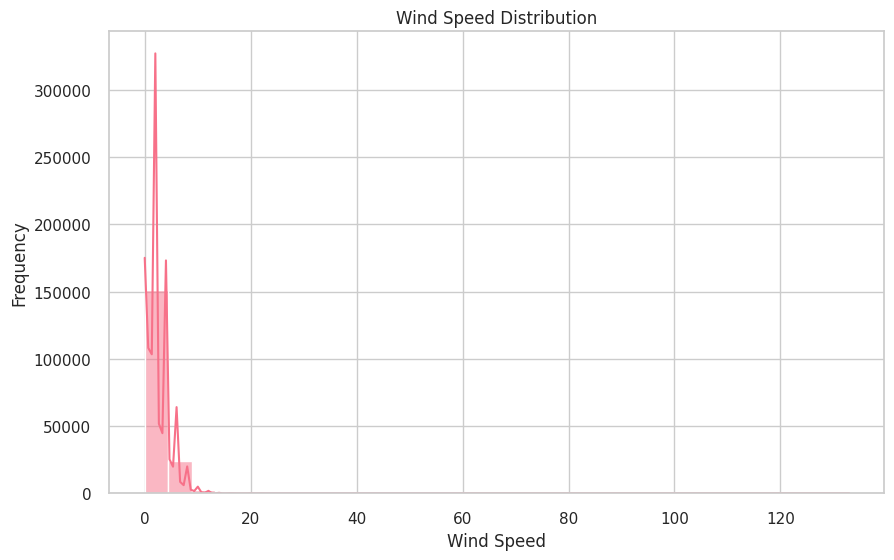

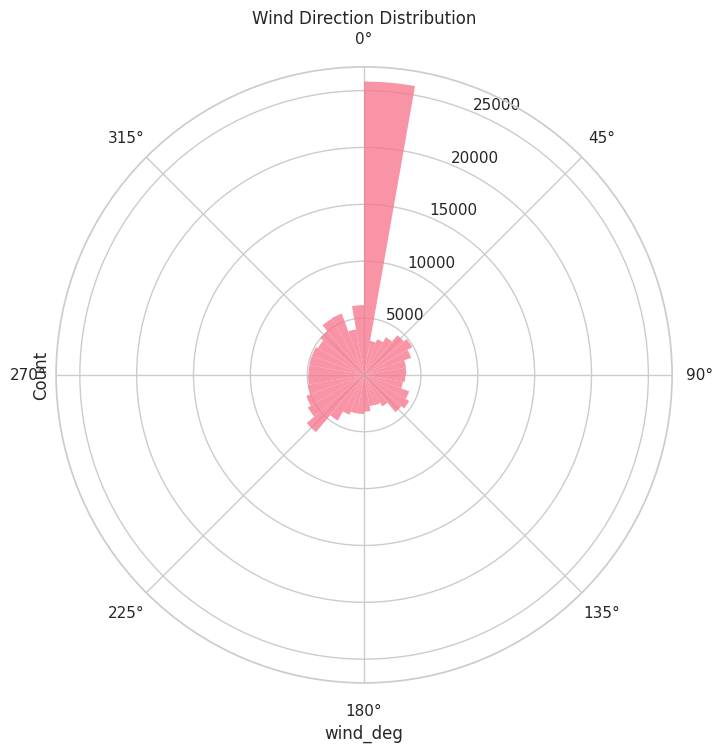

In [21]:
# Wind speed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['wind_speed'], bins=30, kde=True)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.savefig('imgs/wind-speed.png')
plt.show()

# Wind direction analysis
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Direction Distribution')
sns.histplot(np.deg2rad(df['wind_deg']), bins=36, kde=False, ax=ax)
plt.savefig('imgs/wind-direction.png')
plt.show()

Analizamos la distribución de la velocidad del viento y la dirección predominante.

### 13. Pressure and Humidity Analysis

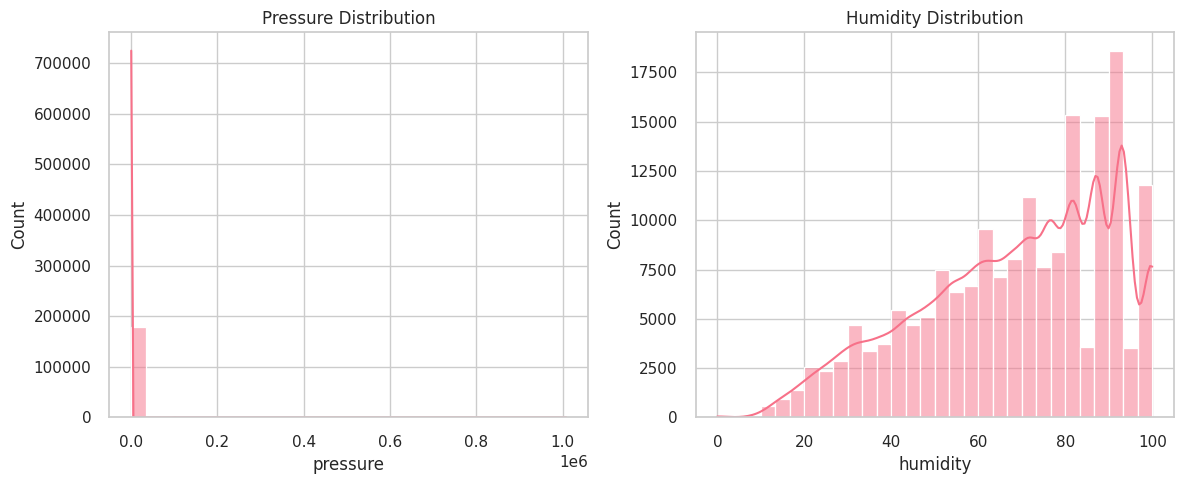

In [22]:
# Pressure distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['pressure'], bins=30, kde=True)
plt.savefig('imgs/pressure.png')
plt.title('Pressure Distribution')

# Humidity distribution
plt.subplot(1, 2, 2)
sns.histplot(df['humidity'], bins=30, kde=True)
plt.title('Humidity Distribution')
plt.tight_layout()
plt.savefig('imgs/humidity.png')
plt.show()

### 14. Precipitation Analysis

Rain occurrence statistics:
Hours with rain: 19388 (10.87%)


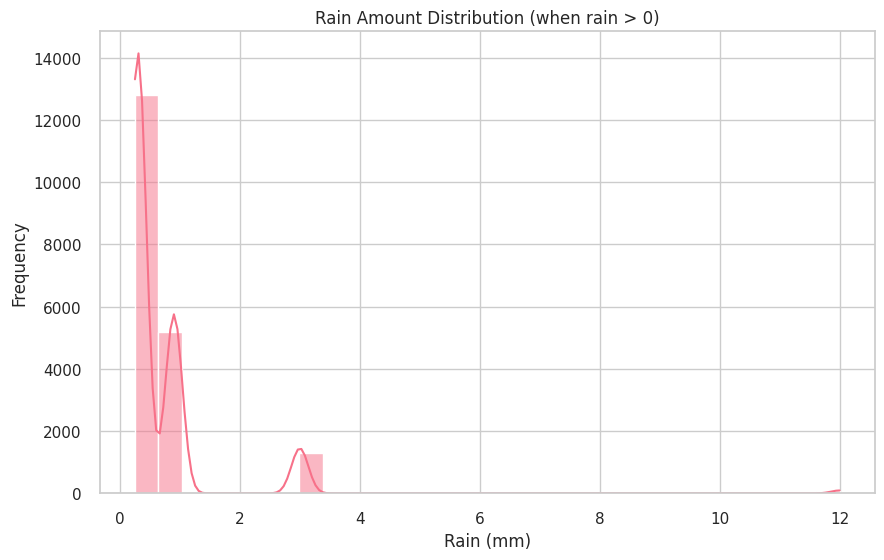

In [23]:
# Rain analysis
print("Rain occurrence statistics:")
print(f"Hours with rain: {(df['rain_1h'] > 0).sum()} ({(df['rain_1h'] > 0).mean()*100:.2f}%)")

# Plot rain amounts when it does rain
plt.figure(figsize=(10, 6))
sns.histplot(df[df['rain_1h'] > 0]['rain_1h'], bins=30, kde=True)
plt.title('Rain Amount Distribution (when rain > 0)')
plt.xlabel('Rain (mm)')
plt.ylabel('Frequency')
plt.savefig('imgs/rain.png')
plt.show()

### 15. Time-based Patterns

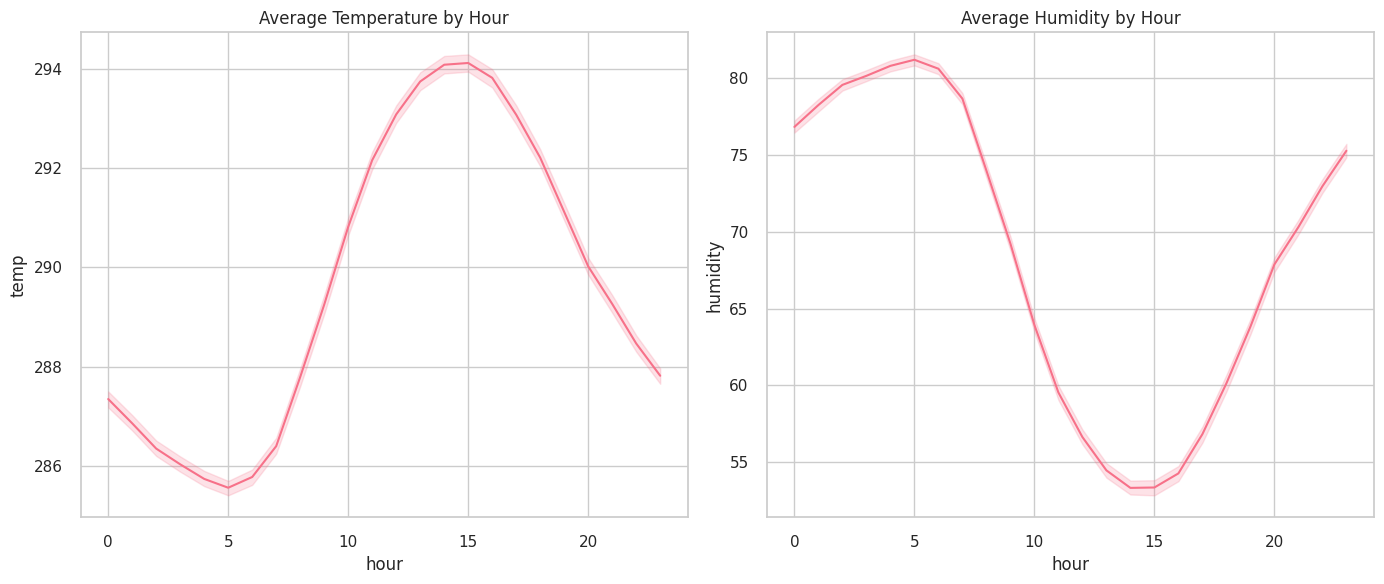

In [24]:
# Diurnal patterns for temperature and humidity
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='hour', y='temp', data=df)
plt.savefig('imgs/hour-temp-avg.png')
plt.title('Average Temperature by Hour')

plt.subplot(1, 2, 2)
sns.lineplot(x='hour', y='humidity', data=df)
plt.title('Average Humidity by Hour')
plt.tight_layout()
plt.savefig('imgs/hour-humidity-avg.png')
plt.show()

### 16. Data Quality Checks

In [25]:
# Check if temp_min <= temp <= temp_max
temp_check = (df['temp'] >= df['temp_min']) & (df['temp'] <= df['temp_max'])
print(f"Rows where temp is not between temp_min and temp_max: {len(df[~temp_check])}")

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

Rows where temp is not between temp_min and temp_max: 0

Number of duplicate rows: 21


### 17. Final Summary of Findings

In [26]:
# Create a summary of key findings
summary = {
    "Total records": len(df),
    "Date range": f"{df['dt_iso'].min()} to {df['dt_iso'].max()}",
    "Missing values": df.isnull().sum().sum(),
    "Columns with zeros": {col: (df[col] == 0).sum() for col in valid_zero_cols},
    "Most common weather": df['weather_main'].value_counts().idxmax(),
    "Average temperature (C)": df['temp_c'].mean(),
    "Rainy hours": (df['rain_1h'] > 0).sum()
}

print("Key Findings Summary:")
for k, v in summary.items():
    print(f"{k}: {v}")

Key Findings Summary:
Total records: 178396
Date range: 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Missing values: 0
Columns with zeros: {'rain_1h': np.int64(159008), 'rain_3h': np.int64(176541), 'snow_3h': np.int64(178129), 'clouds_all': np.int64(82194), 'wind_speed': np.int64(18490)}
Most common weather: clear
Average temperature (C): 16.46860501738382
Rainy hours: 19388
